# Model Selection and Forecasting with Financial Data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dow = pd.read_csv('dowj.txt', sep=" ", header=None).rename({0: 'x'}, axis=1)

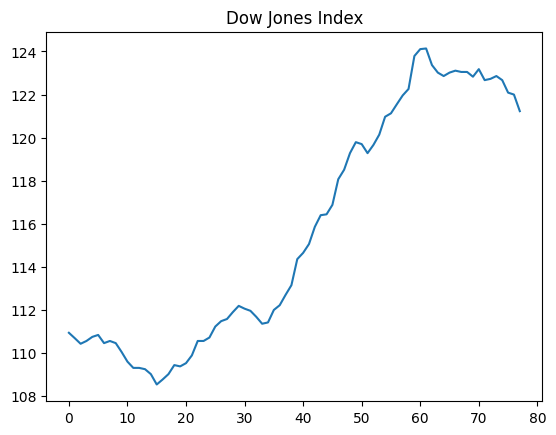

In [13]:
plt.plot(dow)
plt.title('Dow Jones Index')
plt.show()

#### We can see a clear upward trend indicating non-stationarity. There is no clear stationarity at this point

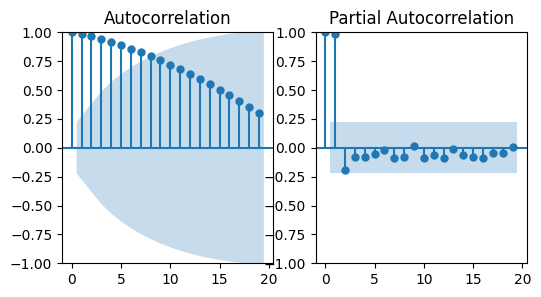

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2,figsize=(6,3))

plot_acf(dow, ax=ax[0]);
plot_pacf(dow, ax=ax[1]);

## Make the data stationary

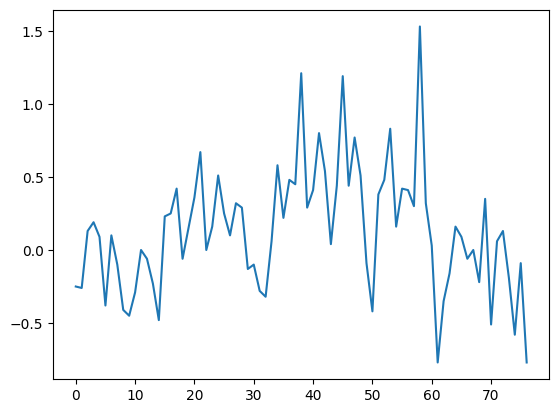

In [30]:
d_dow = dow.diff()
d_dow = d_dow.dropna().reset_index(drop=True)
plt.plot(d_dow)
plt.show()

## Updated ACF and PCAF

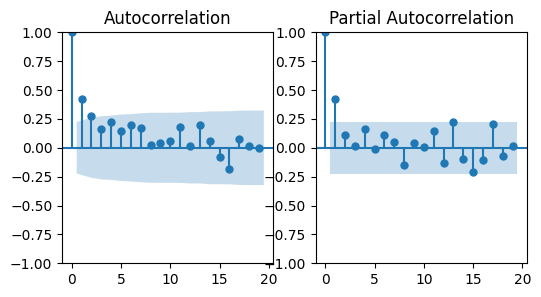

In [33]:
fig, ax = plt.subplots(1,2, figsize=(6,3))
plot_acf(d_dow, ax=ax[0]);
plot_pacf(d_dow, ax=ax[1]);

#### We see evidenceof 1/2 MA lags and 1 AR lags.

In [53]:
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.arima.model import ARIMA

ar_1 = yule_walker(d_dow, order=1)
print(f"Phi = {round(ar_1[0][0],3)}")

Phi = 0.427


In [55]:
model = ARIMA(d_dow, order=(1,0,0)).fit()
ci = model.conf_int(alpha=.05).loc['ar.L1']
print(f"Lower bound: {round(ci[0],3)}\nUpper bound: {round(ci[1],3)}")

Lower bound: 0.186
Upper bound: 0.709
